Dùng thuật toán gradient descent tối ưu hàm f(x) = x^2, với giá trị khởi tạo x = 2 và thử các learning rate khác nhau (0.2, 1, 2), vẽ đồ thị hàm loss để hiện sự thay đổi hàm f(x) sau các bước update.

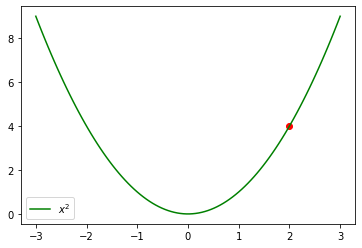

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline


def func(x):
    return np.square(x)

def de_func(x):
  return 2*x

x_test = np.linspace(-3, 3, 100)
y_test = func(x_test)

plt.plot(x_test, y_test, c="g", label="$x^2$")
plt.scatter(2,func(2), color='r')
plt.legend()
plt.show()

In [2]:
def GradientDescent(func, lr=0.1, epochs = 200, x = np.random.randn()):
  x_hist = [x]
  count=0
  while count < epochs:
    new_x = x - lr*de_func(x)
    x_hist.append(new_x)
    if abs(new_x - x) < 1e-8:
      break
    else:
      x = new_x
      count+=1
  return np.round(new_x, decimals=5), x_hist

def plot_func(func, fig):
  x = np.linspace(-2,2, 100)
  y = func(x)
  fig.plot(x,y, alpha = 0.5, color = 'g')

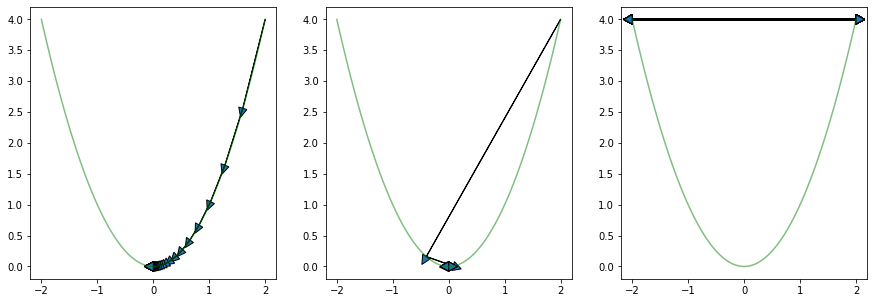

In [3]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
lr_list = [0.1, 0.6, 1]
for index, ax in enumerate(ax):
  plot_func(func, ax)
  point, x_hist = GradientDescent(func, lr=lr_list[index], x=2)
  for a,b in zip(x_hist[:-1], x_hist[1:]):
    ax.arrow(a, func(a), b-a, func(b)-func(a),
           width = 0.005, head_width = 0.15, head_length = 0.15)

Dùng thuật toán logistic regression phân loại hồ sơ cho vay hay không với dữ liệu ở đây (https://github.com/nttuan8/DL_Tutorial/blob/master/L2/dataset.csv), input là lương, thời gian làm việc, output là cho vay hay không.

a.xây dựng model, tìm tham số. \\
b.dự đoán với các hồ sơ sau: (lương 2, thời gian: 3), (lương: 1, thời gian: 8), (lương: 5, thời gian: 5).

In [4]:
data = pd.read_csv('https://raw.githubusercontent.com/nttuan8/DL_Tutorial/master/L2/dataset.csv')
data.head()

,Lương,Thời gian làm việc,Cho vay
0,10,1.0,1
1,5,2.0,1
2,6,1.8,1
3,7,1.0,1
4,8,2.0,1


In [5]:
data = data.to_numpy()

In [6]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

def gradient_func(X, t, weight):
  return np.dot(X.T, sigmoid(np.dot(X, weight.T)).reshape((X.shape[0],)) - t)

def LogisticRegression(X, t, lr, epochs):
  X = np.c_[np.ones(X.shape[0]), X]
  weight = np.random.randn(1, X.shape[1])

  count = 0
  while count < epochs:
      new_weight = weight -  lr*gradient_func(X, t, weight)
      if np.all(abs(new_weight - weight) < 1e-8):
          break
      else:
          weight = new_weight
          count += 1
  prob = sigmoid(np.dot(X, new_weight.T)).reshape(X.shape[0],)
  return np.where(prob>=0.5, 1, 0)

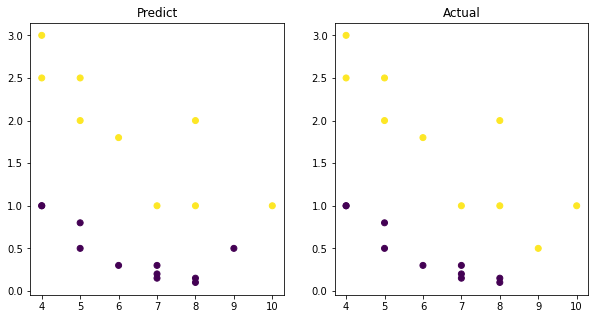

In [9]:
label = LogisticRegression(X = data[:,:-1], t = data[:,-1], lr = 0.002, epochs = 2000)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize= (10,5))
ax1.scatter(data[:,0], data[:,1], c=label)
ax1.set_title('Predict')
ax2.scatter(data[:,0], data[:,1], c=data[:,-1])
ax2.set_title('Actual')
plt.show()

In [10]:
new_data = np.array([[2,3],
               [1,8],
               [5,5]])
new_label = LogisticRegression(X = new_data[:,:-1], t = new_data[:,-1], lr = 0.002, epochs = 2000)
new_label

array([1, 1, 1])